In [7]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

In [18]:
iris = load_iris()

In [19]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

data.feature_names

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
final = df.drop(["sepal length (cm)", "sepal width (cm)"], axis="columns")

In [31]:
final.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


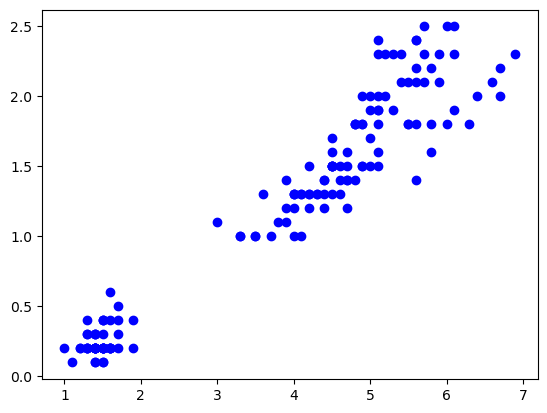

In [32]:
plt.scatter(df[["petal length (cm)"]], df[["petal width (cm)"]], color="blue")

In [33]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)", "petal width (cm)"]])
    sse.append(km.inertia_)

C:\Users\bekad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


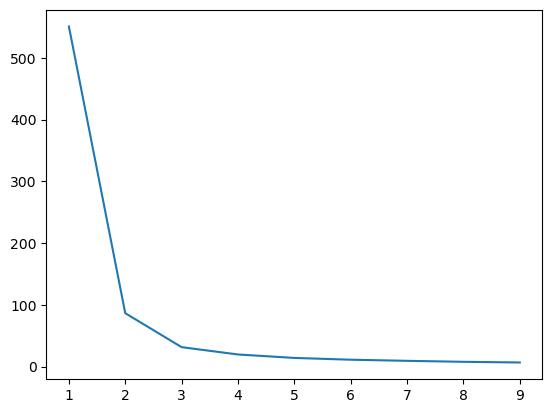

In [35]:
plt.plot(k_rng, sse)

In [36]:
km = KMeans(n_clusters=3)

In [39]:
y_predicted = km.fit_predict(df[["petal length (cm)", "petal width (cm)"]])

In [40]:
final.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [41]:
final["cluster"] = y_predicted

In [42]:
final.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [43]:
df1 = final[final.cluster == 0]
df2 = final[final.cluster == 1]
df3 = final[final.cluster == 2]

In [44]:
df3.head()

,petal length (cm),petal width (cm),cluster
50,4.7,1.4,2
51,4.5,1.5,2
52,4.9,1.5,2
53,4.0,1.3,2
54,4.6,1.5,2


Text(0, 0.5, 'Petal Width (cm)')

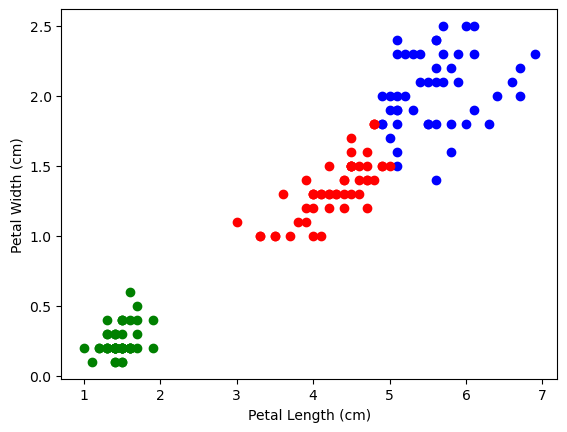

In [45]:
plt.scatter(df1[["petal length (cm)"]], df1[["petal width (cm)"]], color="blue")
plt.scatter(df2[["petal length (cm)"]], df2[["petal width (cm)"]], color="green")
plt.scatter(df3[["petal length (cm)"]], df3[["petal width (cm)"]], color="red")

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")